In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = np.load('fashion_train.npy')

In [57]:
Y=data[:,-1]
X=np.delete(data,-1,axis=1)
label_dict = {0:'T_shirts', 1:'Trouseres', 2:'Pullover', 3: 'Dress', 4:'Shirt'}

mean_vectors = []

for cl in range(5):
    mean_vectors.append(np.mean(X[Y==cl],axis=0))

In [5]:
S_W = np.zeros((784,784))
for cl,mv in zip(range(5),mean_vectors):
    class_sc_mat = np.zeros((784,784))
    for row in X[Y==cl]:
        row,mv = row.reshape(784,1),mv.reshape(784,1)
        class_sc_mat+= (row-mv).dot((row-mv).T)
    S_W += class_sc_mat

In [6]:
overall_mean = np.mean(X,axis= 0)
S_B = np.zeros((784,784))
for i,mean_vec in enumerate(mean_vectors):
    n= X[Y==i,:].shape[0]
    mean_vec=mean_vec.reshape(784,1)
    overall_mean = overall_mean.reshape(784,1)
    S_B+=n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)



(784, 784)

In [20]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(784,1)

In [21]:
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse= True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print(i[0])

Eigenvalues in decreasing order: 

8.400400497528505
2.782194358841238
1.8046306427134786
0.7584194591400125
1.2136180008155694e-13
1.1182065785088237e-13
1.0203189459144795e-13
1.0203189459144795e-13
9.287252706940697e-14
9.287252706940697e-14
8.278709188057213e-14
8.254264795300324e-14
8.254264795300324e-14
7.50332525018971e-14
7.50332525018971e-14
7.436709981442762e-14
7.066971483012653e-14
6.909502683193016e-14
6.909502683193016e-14
6.312776749387908e-14
6.312776749387908e-14
6.205276772869092e-14
6.205276772869092e-14
6.112808132281761e-14
6.080243015131778e-14
5.942117582809527e-14
5.942117582809527e-14
5.863325122684349e-14
5.863325122684349e-14
5.645099849285832e-14
5.645099849285832e-14
5.523979164734759e-14
5.523979164734759e-14
5.4824679981165476e-14
5.4824679981165476e-14
5.4360203817590944e-14
5.4360203817590944e-14
5.409323187601852e-14
5.409323187601852e-14
5.2774374248243464e-14
5.2774374248243464e-14
5.2691021870373574e-14
5.2691021870373574e-14
5.087671219230704e-14
5

In [43]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print ("Eigenvalue {0:}: {1:.2%}". format(i,(j[0]/eigenvalues_sum).real))

Eigenvalue 0: 61.11%
Eigenvalue 1: 20.24%
Eigenvalue 2: 13.13%
Eigenvalue 3: 5.52%
Eigenvalue 4: 0.00%
Eigenvalue 5: 0.00%
Eigenvalue 6: 0.00%
Eigenvalue 7: 0.00%
Eigenvalue 8: 0.00%
Eigenvalue 9: 0.00%
Eigenvalue 10: 0.00%
Eigenvalue 11: 0.00%
Eigenvalue 12: 0.00%
Eigenvalue 13: 0.00%
Eigenvalue 14: 0.00%
Eigenvalue 15: 0.00%
Eigenvalue 16: 0.00%
Eigenvalue 17: 0.00%
Eigenvalue 18: 0.00%
Eigenvalue 19: 0.00%
Eigenvalue 20: 0.00%
Eigenvalue 21: 0.00%
Eigenvalue 22: 0.00%
Eigenvalue 23: 0.00%
Eigenvalue 24: 0.00%
Eigenvalue 25: 0.00%
Eigenvalue 26: 0.00%
Eigenvalue 27: 0.00%
Eigenvalue 28: 0.00%
Eigenvalue 29: 0.00%
Eigenvalue 30: 0.00%
Eigenvalue 31: 0.00%
Eigenvalue 32: 0.00%
Eigenvalue 33: 0.00%
Eigenvalue 34: 0.00%
Eigenvalue 35: 0.00%
Eigenvalue 36: 0.00%
Eigenvalue 37: 0.00%
Eigenvalue 38: 0.00%
Eigenvalue 39: 0.00%
Eigenvalue 40: 0.00%
Eigenvalue 41: 0.00%
Eigenvalue 42: 0.00%
Eigenvalue 43: 0.00%
Eigenvalue 44: 0.00%
Eigenvalue 45: 0.00%
Eigenvalue 46: 0.00%
Eigenvalue 47: 0.00%

In [48]:
W = np.hstack((eigen_pairs[0][1].reshape(784,1),eigen_pairs[1][1].reshape(784,1),eigen_pairs[2][1].reshape(784,1),eigen_pairs[3][1].reshape(784,1)))


In [49]:
X_lda = X.dot(W)


array([-3.23779475e-01+0.j,  1.35781734e-01+0.j,  1.39610800e-01+0.j,
        8.75955118e-02+0.j, -1.46675214e-02+0.j, -3.08808161e-05+0.j,
        8.65576280e-03+0.j, -5.97035139e-03+0.j,  3.67964783e-03+0.j,
        5.80500146e-04+0.j, -1.74165685e-03+0.j,  6.97437076e-03+0.j,
       -5.71772917e-03+0.j,  1.86258317e-03+0.j,  5.32484915e-03+0.j,
       -7.34677658e-03+0.j,  3.78865502e-03+0.j, -5.31286218e-05+0.j,
       -8.25995460e-04+0.j,  6.70885053e-04+0.j,  1.45739887e-03+0.j,
       -1.29772977e-03+0.j, -2.23915189e-03+0.j, -1.29940446e-02+0.j,
       -8.57576935e-03+0.j, -1.88276226e-01+0.j, -6.97476467e-02+0.j,
        1.48157484e-01+0.j,  3.10930479e-01+0.j, -2.88045705e-01+0.j,
       -1.40115062e-02+0.j, -1.83274785e-03+0.j, -1.86415336e-02+0.j,
       -1.13588823e-03+0.j, -2.48204300e-03+0.j,  5.17587485e-04+0.j,
       -2.64707892e-03+0.j,  1.95473336e-03+0.j,  9.86096206e-04+0.j,
        4.66504555e-03+0.j, -4.57673388e-03+0.j,  2.56657277e-03+0.j,
        1.71728615e-

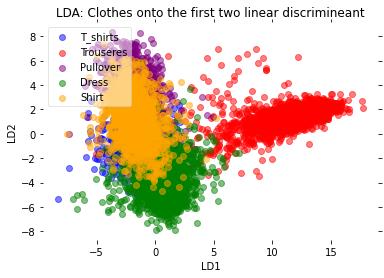

In [76]:
def plot_step_lda():
    ax=plt.subplot(111)
    for label, color in zip(range(5),("blue","red","purple","green","orange")):
        plt.scatter(x=X_lda[:,0].real[Y==label],
        y = (X_lda[:,1].real[Y==label])*-1, color = color , alpha=0.5, label = label_dict[label])

    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend(loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Clothes onto the first two linear discrimineant")

    plt.tick_params(axis= 'both', which = 'both', bottom = 'off', top = 'off', labelbottom = 'on', left = 'off', right ='off', labelleft= 'on')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

plot_step_lda()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)